In [ ]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows of the dataset
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


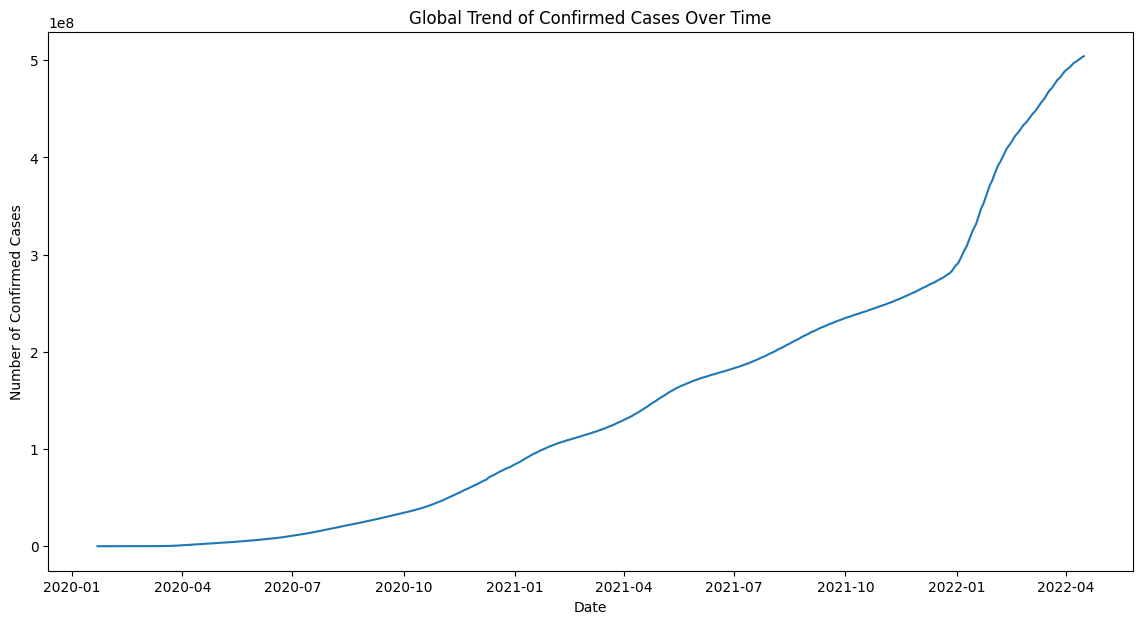

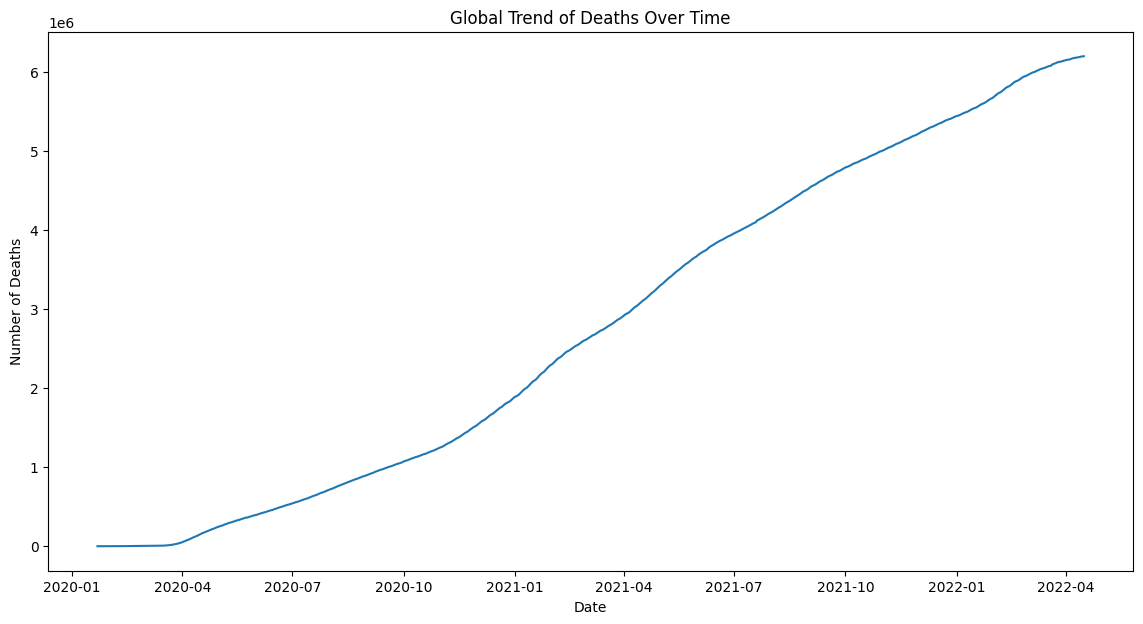

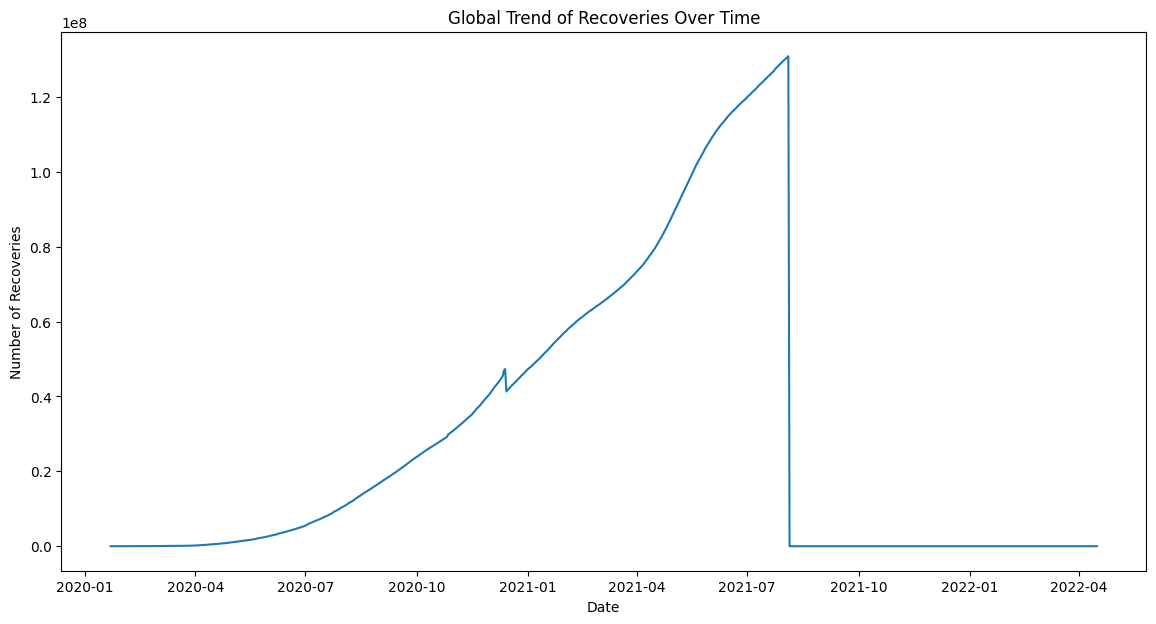

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize global data by date
global_data = df.groupby('Date').sum().reset_index()

# Plot global trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', data=global_data)
plt.title('Global Trend of Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Deaths', data=global_data)
plt.title('Global Trend of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Recovered', data=global_data)
plt.title('Global Trend of Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.show()


In [ ]:
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

max_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
max_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
max_recoveries = latest_data.loc[latest_data['Recovered'].idxmax()]

print("Country with the highest number of confirmed cases:", max_confirmed['Country'])
print("Country with the highest number of deaths:", max_deaths['Country'])
print("Country with the highest number of recoveries:", max_recoveries['Country'])


Country with the highest number of confirmed cases: US
Country with the highest number of deaths: US
Country with the highest number of recoveries: Afghanistan


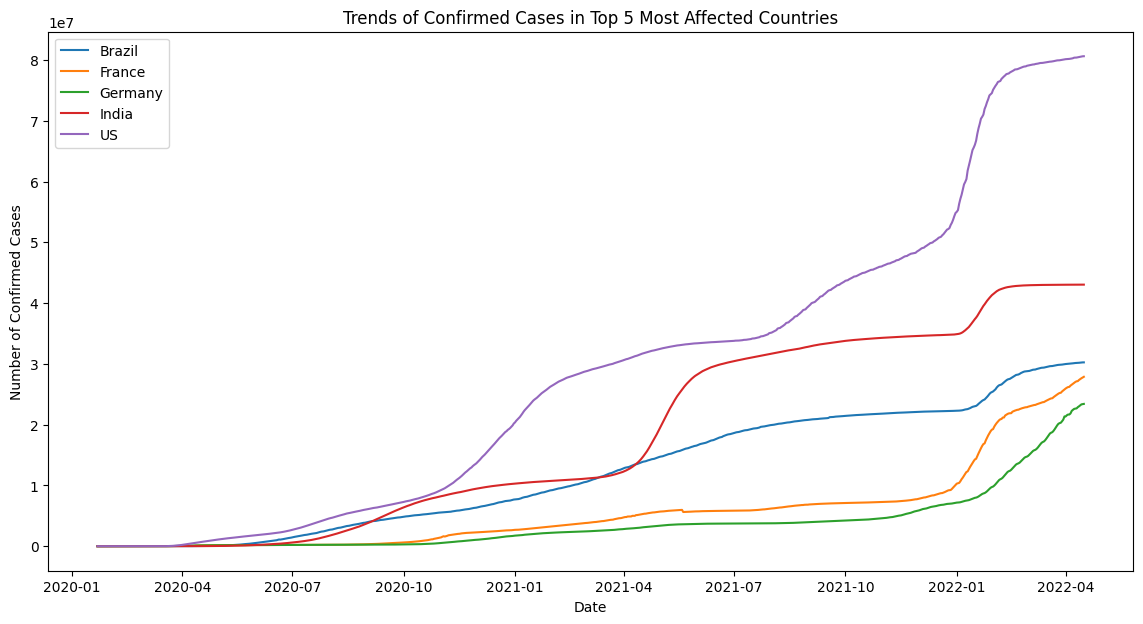

In [ ]:
top_5_countries = latest_data.nlargest(5, 'Confirmed')['Country']
top_5_data = df[df['Country'].isin(top_5_countries)]

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', hue='Country', data=top_5_data)
plt.title('Trends of Confirmed Cases in Top 5 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend(loc='upper left')
plt.show()


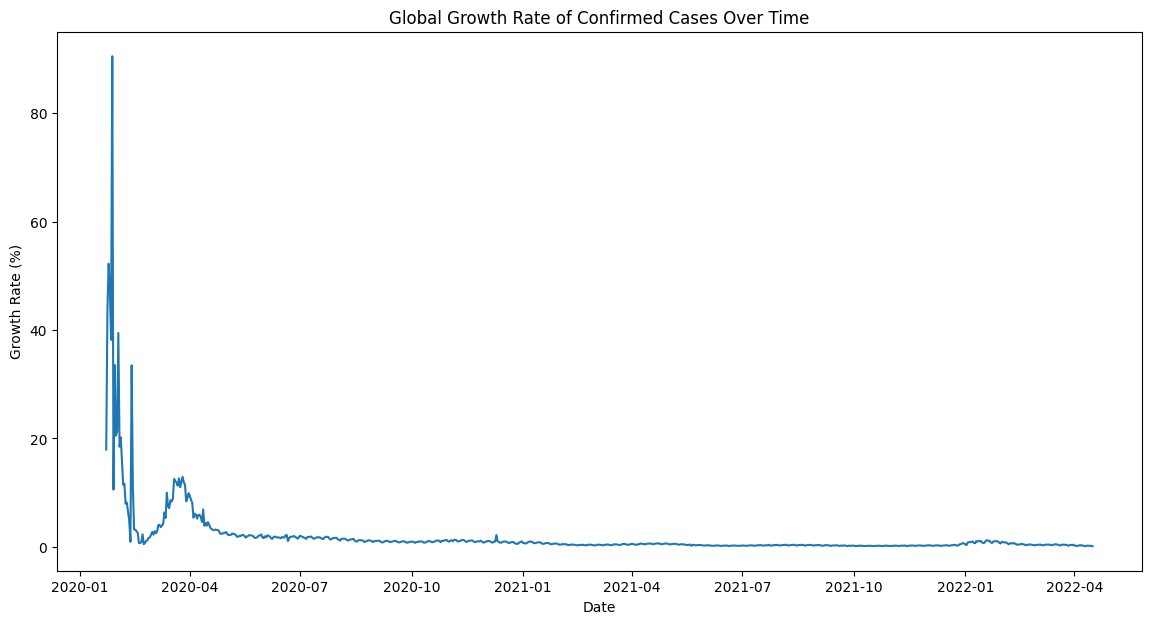

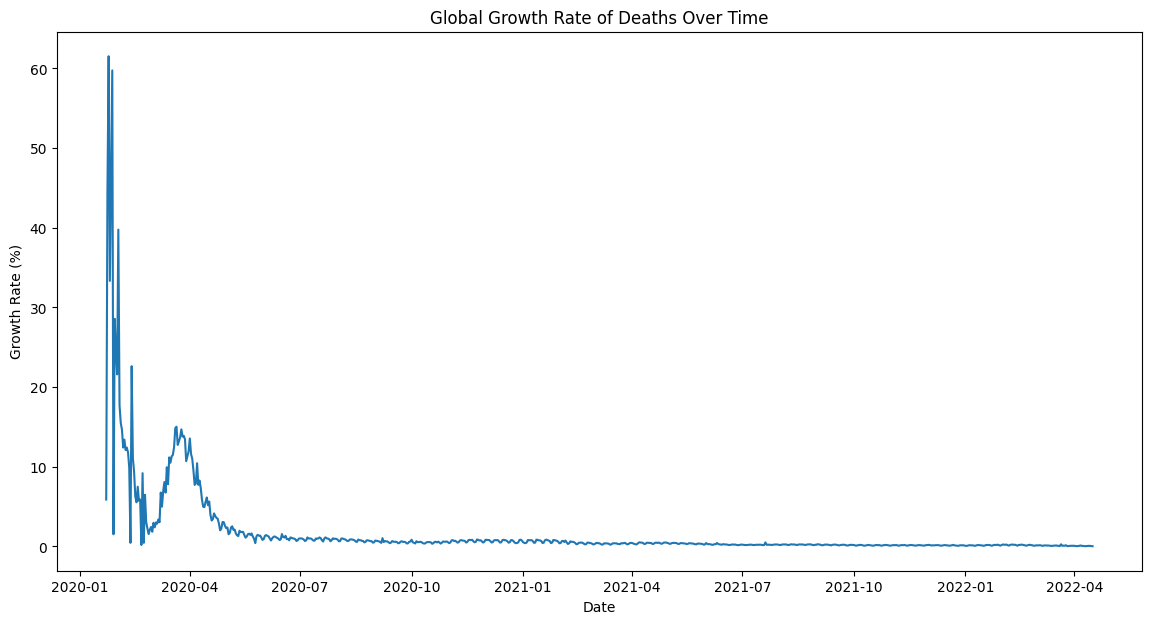

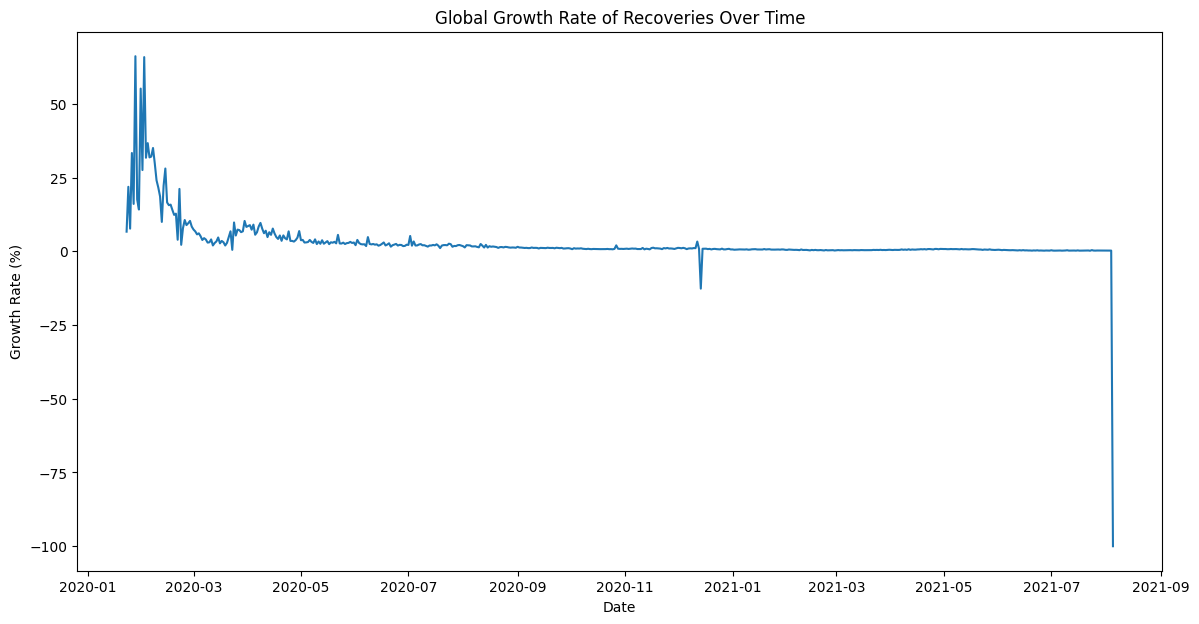

In [ ]:
global_data['Confirmed_Growth_Rate'] = global_data['Confirmed'].pct_change() * 100
global_data['Deaths_Growth_Rate'] = global_data['Deaths'].pct_change() * 100
global_data['Recovered_Growth_Rate'] = global_data['Recovered'].pct_change() * 100

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed_Growth_Rate', data=global_data)
plt.title('Global Growth Rate of Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Deaths_Growth_Rate', data=global_data)
plt.title('Global Growth Rate of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Recovered_Growth_Rate', data=global_data)
plt.title('Global Growth Rate of Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()


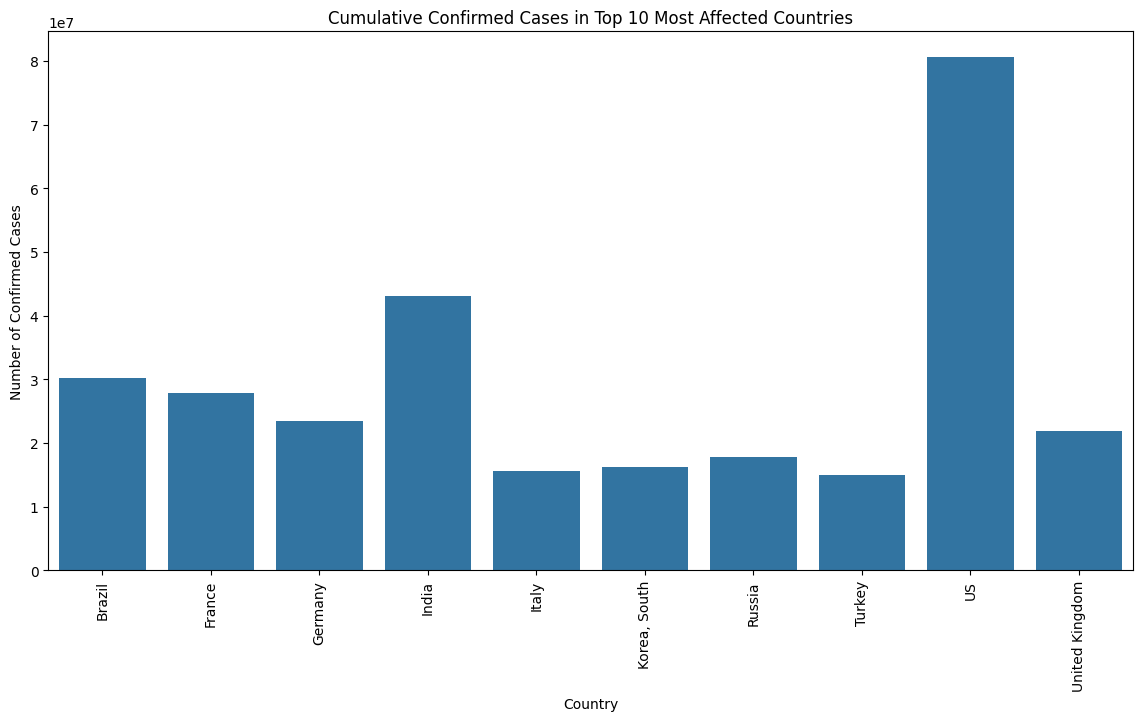

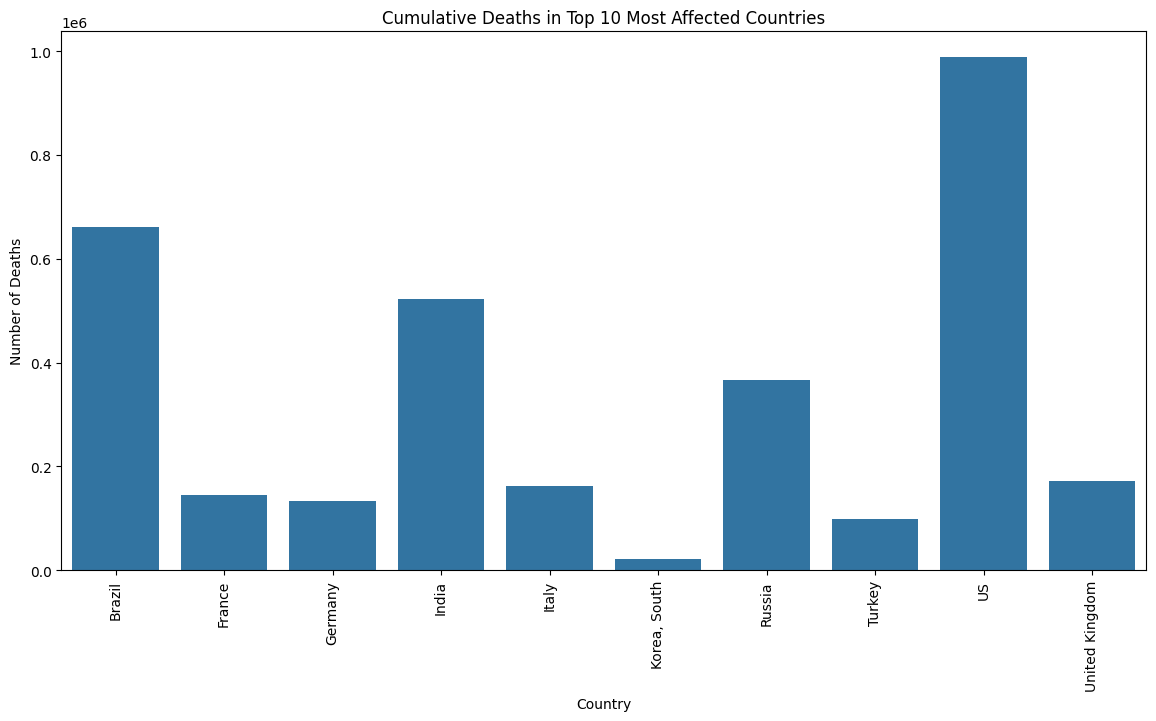

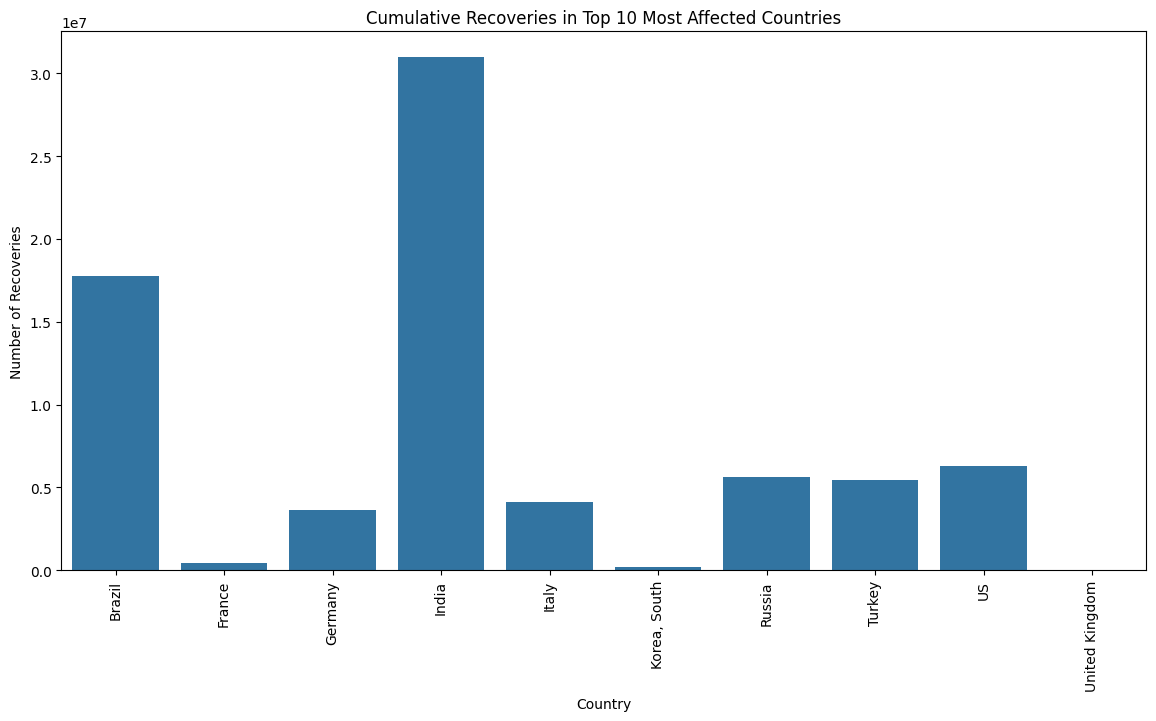

In [ ]:
top_10_countries = latest_data.nlargest(10, 'Confirmed')['Country']
top_10_data = df[df['Country'].isin(top_10_countries)]

cumulative_data = top_10_data.groupby('Country').max().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Confirmed', data=cumulative_data)
plt.title('Cumulative Confirmed Cases in Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Deaths', data=cumulative_data)
plt.title('Cumulative Deaths in Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Recovered', data=cumulative_data)
plt.title('Cumulative Recoveries in Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Recoveries')
plt.xticks(rotation=90)
plt.show()


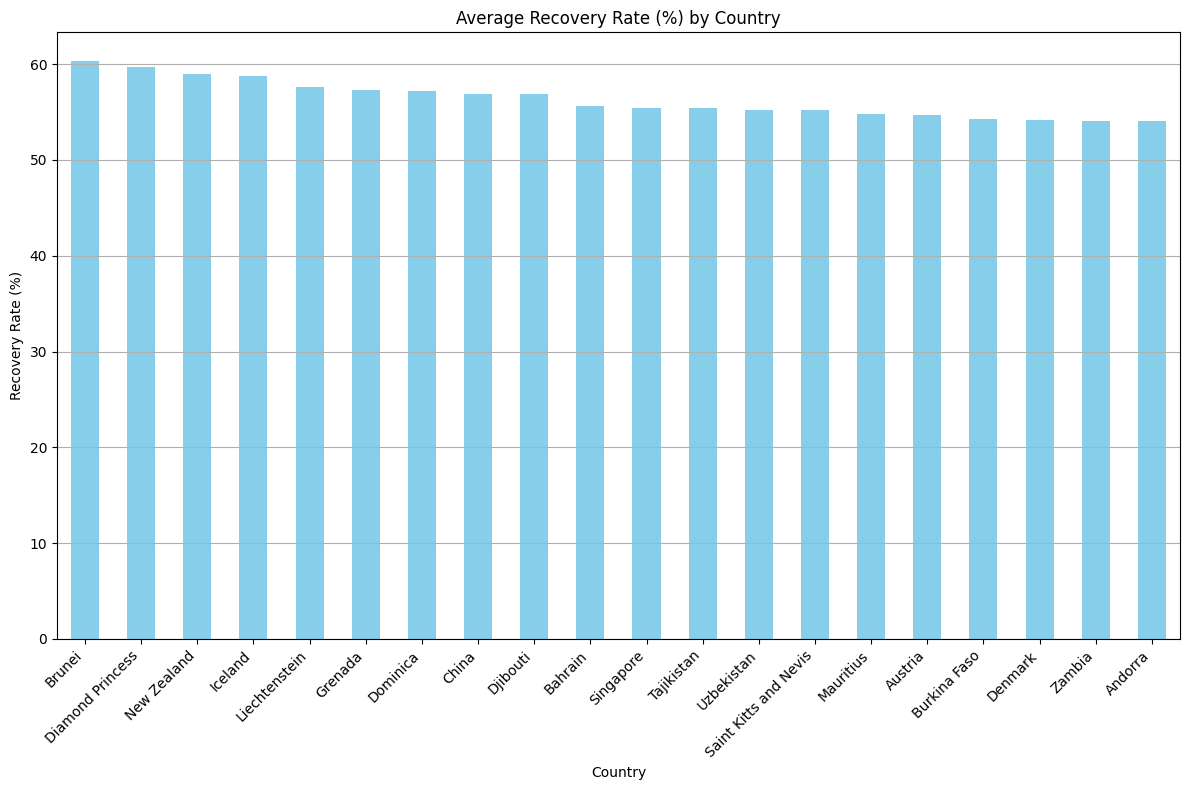

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate recovery rate (%) for each country
df['RecoveryRate'] = (df['Recovered'] / df['Confirmed']) * 100

# Group by country and calculate average recovery rate
country_recovery_rates = df.groupby('Country')['RecoveryRate'].mean()

# Sort countries by recovery rate descending
country_recovery_rates = country_recovery_rates.sort_values(ascending=False)

# Plotting the recovery rates for each country
plt.figure(figsize=(12, 8))
country_recovery_rates.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Recovery Rate (%) by Country')
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


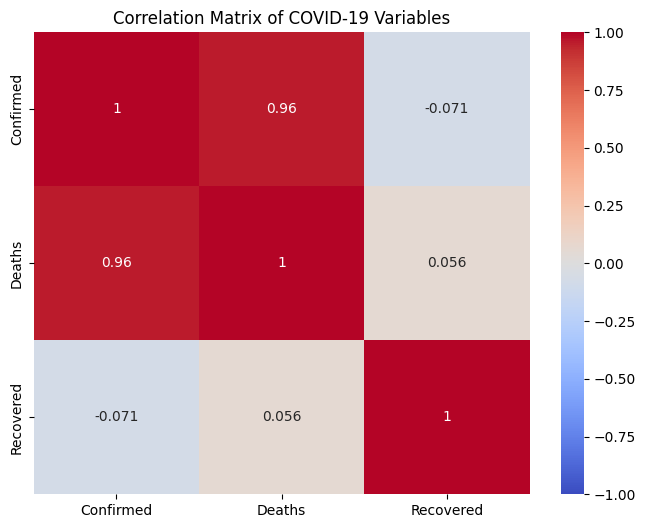

In [ ]:
correlation_matrix = global_data[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()


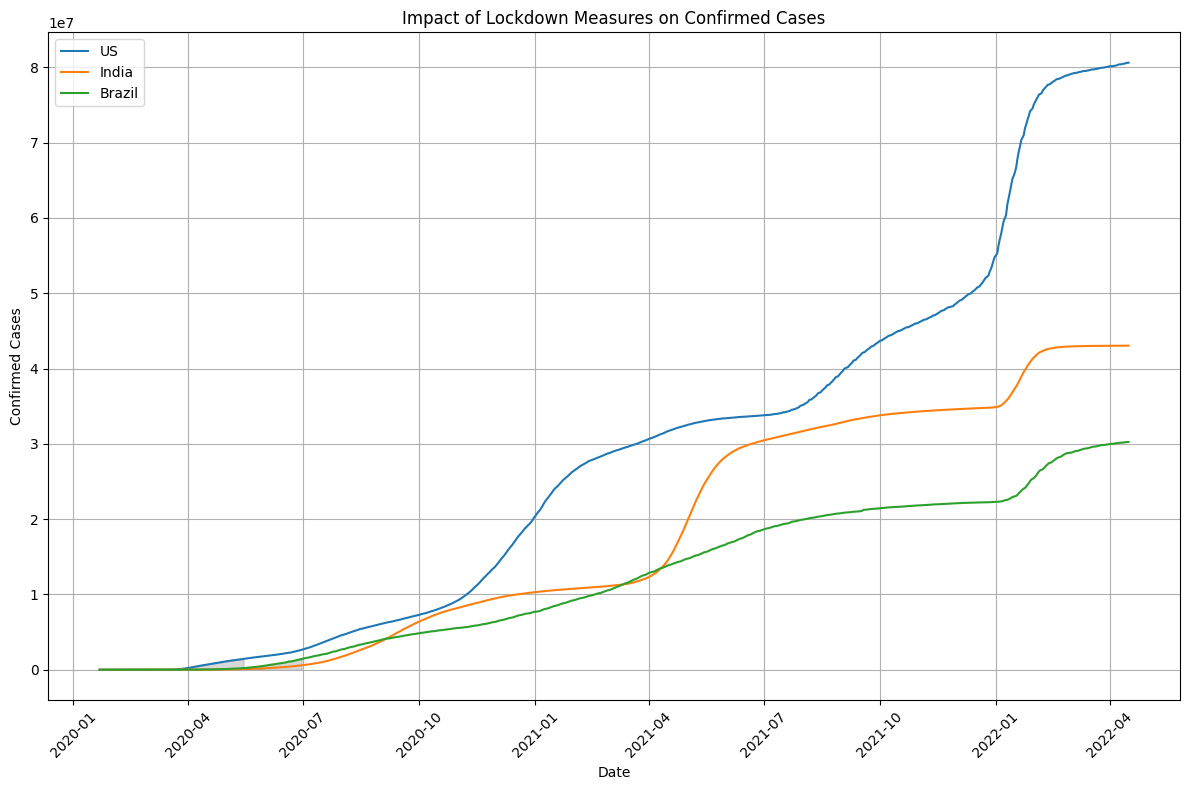

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Example: Define lockdown periods for selected countries (adjust as per your data)
lockdown_periods = {
    'US': ('2020-03-15', '2020-05-15'),
    'India': ('2020-04-01', '2020-05-31'),
    'Brazil': ('2020-03-20', '2020-06-30')
}

# Plot trends for confirmed cases in each country
plt.figure(figsize=(12, 8))

for country, (start_date, end_date) in lockdown_periods.items():
    df_country = df[df['Country'] == country]
    df_lockdown = df_country[(df_country['Date'] >= start_date) & (df_country['Date'] <= end_date)]

    plt.plot(df_country['Date'], df_country['Confirmed'], label=f'{country}')
    plt.fill_between(df_lockdown['Date'], df_lockdown['Confirmed'], color='gray', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Impact of Lockdown Measures on Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


             Date      Country  Confirmed  Recovered  Deaths  RecoveryRate  \
0      2020-01-22  Afghanistan          0          0       0           NaN   
1      2020-01-23  Afghanistan          0          0       0           NaN   
2      2020-01-24  Afghanistan          0          0       0           NaN   
3      2020-01-25  Afghanistan          0          0       0           NaN   
4      2020-01-26  Afghanistan          0          0       0           NaN   
...           ...          ...        ...        ...     ...           ...   
161563 2022-04-12     Zimbabwe     247094          0    5460           0.0   
161564 2022-04-13     Zimbabwe     247160          0    5460           0.0   
161565 2022-04-14     Zimbabwe     247208          0    5462           0.0   
161566 2022-04-15     Zimbabwe     247237          0    5462           0.0   
161567 2022-04-16     Zimbabwe     247237          0    5462           0.0   

         tests  
0       481484  
1       325711  
2       4558

<Figure size 1000x800 with 0 Axes>

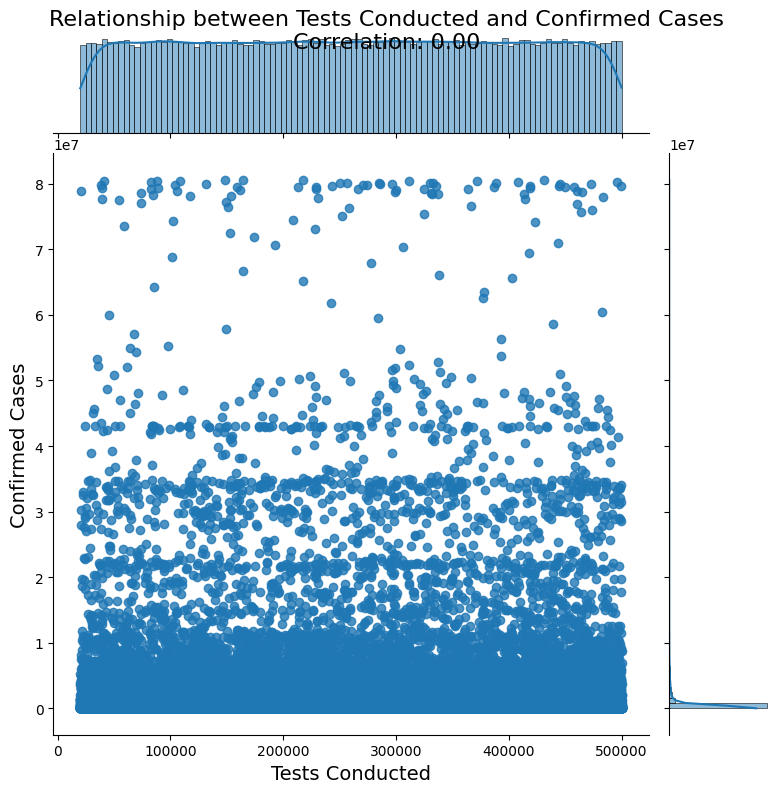

Correlation between tests conducted and confirmed cases: 0.00


In [ ]:
import pandas as pd
import numpy as np


np.random.seed(0)
df['tests'] = np.random.randint(20000, 500000, len(df))

# Displaying the updated DataFrame
print(df)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tests' column is available in the DataFrame
# If not, you should merge or add the relevant data before proceeding

# Calculate the correlation
correlation = df['tests'].corr(df['Confirmed'])

# Plotting the relationship using joint plot with regression line
plt.figure(figsize=(10, 8))
sns.jointplot(x='tests', y='Confirmed', data=df, kind='reg', height=8, ratio=5, marginal_kws=dict(bins=100, fill=True))

# Adding title and correlation text
plt.suptitle(f'Relationship between Tests Conducted and Confirmed Cases\nCorrelation: {correlation:.2f}', fontsize=16)
plt.xlabel('Tests Conducted', fontsize=14)
plt.ylabel('Confirmed Cases', fontsize=14)

# Adjusting the title position
plt.subplots_adjust(top=0.95)
plt.show()

# Print correlation value
print(f"Correlation between tests conducted and confirmed cases: {correlation:.2f}")

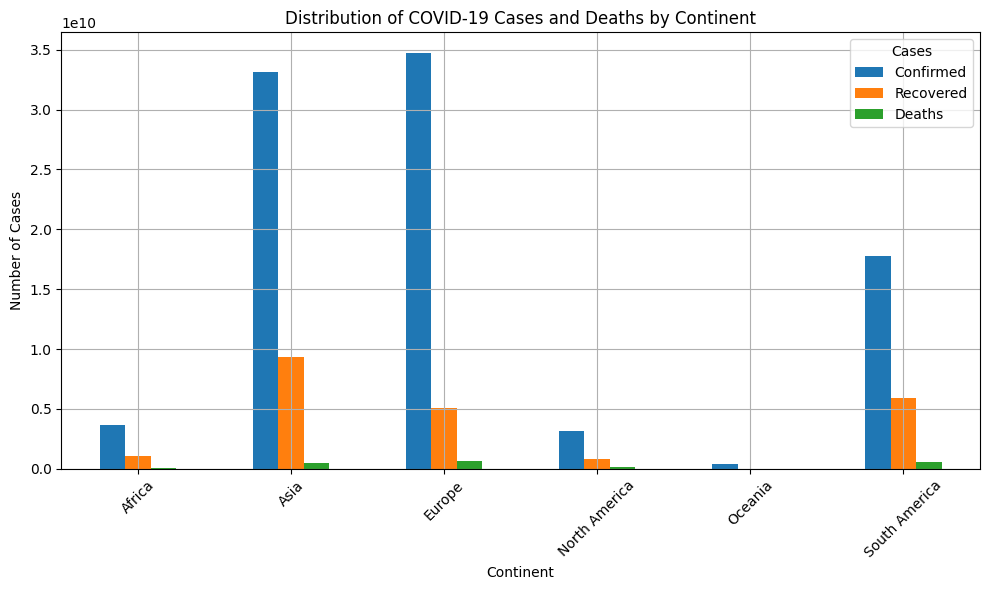

In [ ]:
country_to_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Anguilla": "North America",
    "Antigua & Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Aruba": "North America",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bermuda": "North America",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia & Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Cape Verde": "Africa",
    "Cayman Islands": "North America",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Congo": "Africa",
    "Cook Islands": "Oceania",
    "Costa Rica": "North America",
    "Cote D Ivoire": "Africa",
    "Croatia": "Europe",
    "Cruise Ship": None,  # Assuming no specific continent for cruise ships
    "Cuba": "North America",
    "Cyprus": "Asia",  # Technically part of Asia, politically part of Europe
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Equatorial Guinea": "Africa",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Falkland Islands": "South America",
    "Faroe Islands": "Europe",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Polynesia": "Oceania",
    "French West Indies": "North America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Gibraltar": "Europe",
    "Greece": "Europe",
    "Greenland": "North America",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guatemala": "North America",
    "Guernsey": "Europe",
    "Guinea": "Africa",
    "Guinea Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hong Kong": "Asia",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Isle of Man": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jersey": "Europe",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kuwait": "Asia",
    "Kyrgyz Republic": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macau": "Asia",
    "Macedonia": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Montserrat": "North America",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Namibia": "Africa",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "Netherlands Antilles": "North America",
    "New Caledonia": "Oceania",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Reunion": "Africa",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Pierre & Miquelon": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Satellite": None,  # Assuming no specific continent for satellite
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "St Kitts & Nevis": "North America",
    "St Lucia": "North America",
    "St Vincent": "North America",
    "St. Lucia": "North America",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Timor L'Este": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad & Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Turks & Caicos": "North America",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Virgin Islands (US)": "North America",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "North Macedonia": "Europe",
    "Comoros": "Africa",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Vanuatu": "Oceania",
    "Eritrea": "Africa",
    "Cabo Verde": "Africa",
    "Congo (Kinshasa)": "Africa",
    "Congo (Brazzaville)": "Africa",
    "Solomon Islands": "Oceania",
    "Central African Republic": "Africa",
    "Timor-Leste": "Asia",
    "Somalia": "Africa",
    "South Sudan": "Africa",
    "Kiribati": "Oceania",
    "Burma": "Asia",
}
Country_to_continent = {country: continent for country, continent in country_to_continent.items() if continent is not None}

# Add columns for Continent to DataFrame
df['Continent'] = df['Country'].map(country_to_continent)

# Aggregate data by Continent
continent_data = df.groupby('Continent')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Plotting the distribution
import matplotlib.pyplot as plt

continent_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Cases and Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Cases')
plt.grid(True)
plt.tight_layout()
plt.show()